# Task 1: Introduction

---

For this project, we are going to work on evaluating price of houses given the following features:

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude

![Regression](images/regression.png)

Note: This notebook uses `python 3` and these packages: `tensorflow`, `pandas`, `matplotlib`, `scikit-learn`.

## 1.1: Importing Libraries & Helper Functions

First of all, we will need to import some libraries and helper functions. This includes TensorFlow and some utility functions that I've written to save time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

print('Libraries imported.')

C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework

Libraries imported.


# Task 2: Importing the Data

## 2.1: Importing the Data

The dataset is saved in a `data.csv` file. We will use `pandas` to take a look at some of the rows.

In [2]:
df = pd.read_csv('data.csv', names = column_names) 
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## 2.2: Check Missing Data

It's a good practice to check if the data has any missing values. In real world data, this is quite common and must be taken care of before any data pre-processing or model training.

In [3]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# Task 3: Data Normalization

## 3.1: Data Normalization

We can make it easier for optimization algorithms to find minimas by normalizing the data before training a model.

In [4]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## 3.2: Convert Label Value

Because we are using normalized values for the labels, we will get the predictions back from a trained model in the same distribution. So, we need to convert the predicted values back to the original distribution if we want predicted prices.

In [5]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

print(convert_label_value(0.350088))

14263


# Task 4: Create Training and Test Sets

## 4.1: Select Features

Make sure to remove the column __price__ from the list of features as it is the label and should not be used as a feature.

In [6]:
X = df_norm.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


## 4.2: Select Labels

In [7]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## 4.3: Feature and Label Values

We will need to extract just the numeric values for the features and labels as the TensorFlow model will expect just numeric values as input.

In [8]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


## 4.4: Train and Test Split

We will keep some part of the data aside as a __test__ set. The model will not use this set during training and it will be used only for checking the performance of the model in trained and un-trained states. This way, we can make sure that we are going in the right direction with our model training.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.05, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4750, 6)
y_train shape:  (4750,)
X_test shape:  (250, 6)
y_test shape:  (250,)


# Task 5: Create the Model

## 5.1: Create the Model

Let's write a function that returns an untrained model of a certain architecture.

In [10]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# Task 6: Model Training

## 6.1: Model Training

We can use an `EarlyStopping` callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs.

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = get_model()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000,
    callbacks = [early_stopping]
)

Train on 4750 samples, validate on 250 samples
Epoch 1/1000
4750/4750 [==============================] - ETA: 0s - loss: 1.946 - 1s 271us/sample - loss: 1.9542 - val_loss: 1.9177
Epoch 2/1000
4750/4750 [==============================] - 0s 79us/sample - loss: 1.9422 - val_loss: 1.9053
Epoch 3/1000
4750/4750 [==============================] - 1s 126us/sample - loss: 1.9301 - val_loss: 1.8930
Epoch 4/1000
4750/4750 [==============================] - 1s 124us/sample - loss: 1.9181 - val_loss: 1.8807
Epoch 5/1000
4750/4750 [==============================] - 1s 126us/sample - loss: 1.9060 - val_loss: 1.8683
Epoch 6/1000
4750/4750 [==============================] - 1s 125us/sample - loss: 1.8939 - val_loss: 1.8559
Epoch 7/1000
4750/4750 [==============================] - 1s 129us/sample - loss: 1.8818 - val_loss: 1.8435
Epoch 8/1000
4750/4750 [==============================] - 1s 125us/sample - loss: 1.8697 - val_loss: 1.8310
Epoch 9/1000
4750/4750 [==============================] - 1s 125us

Epoch 76/1000
4750/4750 [==============================] - 0s 62us/sample - loss: 1.2947 - val_loss: 1.2341
Epoch 77/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 1.2896 - val_loss: 1.2286
Epoch 78/1000
4750/4750 [==============================] - 1s 112us/sample - loss: 1.2844 - val_loss: 1.2231
Epoch 79/1000
4750/4750 [==============================] - 0s 105us/sample - loss: 1.2794 - val_loss: 1.2177
Epoch 80/1000
4750/4750 [==============================] - 1s 105us/sample - loss: 1.2744 - val_loss: 1.2124
Epoch 81/1000
4750/4750 [==============================] - 1s 108us/sample - loss: 1.2695 - val_loss: 1.2072
Epoch 82/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 1.2648 - val_loss: 1.2021
Epoch 83/1000
4750/4750 [==============================] - 1s 105us/sample - loss: 1.2601 - val_loss: 1.1972
Epoch 84/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 1.2555 - val_loss: 1.1923
Epoch 85/1000
4750/47

4750/4750 [==============================] - 1s 126us/sample - loss: 1.0386 - val_loss: 0.9605
Epoch 151/1000
4750/4750 [==============================] - 1s 110us/sample - loss: 1.0364 - val_loss: 0.9582
Epoch 152/1000
4750/4750 [==============================] - 1s 113us/sample - loss: 1.0342 - val_loss: 0.9559
Epoch 153/1000
4750/4750 [==============================] - 0s 104us/sample - loss: 1.0320 - val_loss: 0.9536
Epoch 154/1000
4750/4750 [==============================] - 1s 114us/sample - loss: 1.0298 - val_loss: 0.9513
Epoch 155/1000
4750/4750 [==============================] - 1s 108us/sample - loss: 1.0277 - val_loss: 0.9492
Epoch 156/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 1.0256 - val_loss: 0.9469
Epoch 157/1000
4750/4750 [==============================] - 1s 113us/sample - loss: 1.0235 - val_loss: 0.9448
Epoch 158/1000
4750/4750 [==============================] - 1s 118us/sample - loss: 1.0214 - val_loss: 0.9426
Epoch 159/1000
4750/4750 

4750/4750 [==============================] - 0s 95us/sample - loss: 0.9133 - val_loss: 0.8340
Epoch 225/1000
4750/4750 [==============================] - 0s 71us/sample - loss: 0.9120 - val_loss: 0.8327
Epoch 226/1000
4750/4750 [==============================] - 0s 84us/sample - loss: 0.9107 - val_loss: 0.8314
Epoch 227/1000
4750/4750 [==============================] - 1s 110us/sample - loss: 0.9094 - val_loss: 0.8301
Epoch 228/1000
4750/4750 [==============================] - 0s 71us/sample - loss: 0.9081 - val_loss: 0.8288
Epoch 229/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.9068 - val_loss: 0.8275
Epoch 230/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.9055 - val_loss: 0.8262
Epoch 231/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.9043 - val_loss: 0.8250
Epoch 232/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.9030 - val_loss: 0.8238
Epoch 233/1000
4750/4750 [=======

4750/4750 [==============================] - 1s 140us/sample - loss: 0.8289 - val_loss: 0.7522
Epoch 300/1000
4750/4750 [==============================] - 1s 118us/sample - loss: 0.8279 - val_loss: 0.7513
Epoch 301/1000
4750/4750 [==============================] - 1s 125us/sample - loss: 0.8268 - val_loss: 0.7503
Epoch 302/1000
4750/4750 [==============================] - 1s 110us/sample - loss: 0.8258 - val_loss: 0.7494
Epoch 303/1000
4750/4750 [==============================] - 1s 113us/sample - loss: 0.8248 - val_loss: 0.7485
Epoch 304/1000
4750/4750 [==============================] - 1s 113us/sample - loss: 0.8238 - val_loss: 0.7476
Epoch 305/1000
4750/4750 [==============================] - 1s 109us/sample - loss: 0.8228 - val_loss: 0.7467
Epoch 306/1000
4750/4750 [==============================] - 1s 110us/sample - loss: 0.8218 - val_loss: 0.7458
Epoch 307/1000
4750/4750 [==============================] - 1s 113us/sample - loss: 0.8208 - val_loss: 0.7448
Epoch 308/1000
4750/4750 

4750/4750 [==============================] - 1s 123us/sample - loss: 0.7546 - val_loss: 0.6876
Epoch 374/1000
4750/4750 [==============================] - 1s 123us/sample - loss: 0.7536 - val_loss: 0.6867
Epoch 375/1000
4750/4750 [==============================] - 1s 122us/sample - loss: 0.7526 - val_loss: 0.6858
Epoch 376/1000
4750/4750 [==============================] - 1s 111us/sample - loss: 0.7516 - val_loss: 0.6850
Epoch 377/1000
4750/4750 [==============================] - 0s 104us/sample - loss: 0.7506 - val_loss: 0.6841
Epoch 378/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.7495 - val_loss: 0.6833
Epoch 379/1000
4750/4750 [==============================] - 0s 103us/sample - loss: 0.7485 - val_loss: 0.6824
Epoch 380/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.7475 - val_loss: 0.6816
Epoch 381/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.7465 - val_loss: 0.6807
Epoch 382/1000
4750/4750 

4750/4750 [==============================] - 0s 63us/sample - loss: 0.6783 - val_loss: 0.6217
Epoch 448/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.6773 - val_loss: 0.6208
Epoch 449/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.6763 - val_loss: 0.6199
Epoch 450/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.6752 - val_loss: 0.6190
Epoch 451/1000
4750/4750 [==============================] - 0s 72us/sample - loss: 0.6742 - val_loss: 0.6181
Epoch 452/1000
4750/4750 [==============================] - 0s 85us/sample - loss: 0.6732 - val_loss: 0.6172
Epoch 453/1000
4750/4750 [==============================] - 0s 87us/sample - loss: 0.6722 - val_loss: 0.6162
Epoch 454/1000
4750/4750 [==============================] - 0s 85us/sample - loss: 0.6711 - val_loss: 0.6153
Epoch 455/1000
4750/4750 [==============================] - 0s 87us/sample - loss: 0.6701 - val_loss: 0.6144
Epoch 456/1000
4750/4750 [========

Epoch 522/1000
4750/4750 [==============================] - 1s 124us/sample - loss: 0.6021 - val_loss: 0.5554
Epoch 523/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.6011 - val_loss: 0.5545
Epoch 524/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.6001 - val_loss: 0.5536
Epoch 525/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.5991 - val_loss: 0.5527
Epoch 526/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.5981 - val_loss: 0.5519
Epoch 527/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.5972 - val_loss: 0.5510
Epoch 528/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.5962 - val_loss: 0.5502
Epoch 529/1000
4750/4750 [==============================] - 0s 105us/sample - loss: 0.5952 - val_loss: 0.5493
Epoch 530/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.5942 - val_loss: 0.5484
Epoch 531/

4750/4750 [==============================] - 1s 111us/sample - loss: 0.5327 - val_loss: 0.4957
Epoch 597/1000
4750/4750 [==============================] - 0s 104us/sample - loss: 0.5318 - val_loss: 0.4949
Epoch 598/1000
4750/4750 [==============================] - 0s 105us/sample - loss: 0.5309 - val_loss: 0.4942
Epoch 599/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.5300 - val_loss: 0.4934
Epoch 600/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.5292 - val_loss: 0.4926
Epoch 601/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.5283 - val_loss: 0.4919
Epoch 602/1000
4750/4750 [==============================] - 1s 105us/sample - loss: 0.5274 - val_loss: 0.4911
Epoch 603/1000
4750/4750 [==============================] - 0s 105us/sample - loss: 0.5265 - val_loss: 0.4903
Epoch 604/1000
4750/4750 [==============================] - 0s 104us/sample - loss: 0.5256 - val_loss: 0.4896
Epoch 605/1000
4750/4750 

4750/4750 [==============================] - 0s 98us/sample - loss: 0.4721 - val_loss: 0.4425
Epoch 671/1000
4750/4750 [==============================] - 1s 113us/sample - loss: 0.4713 - val_loss: 0.4419
Epoch 672/1000
4750/4750 [==============================] - 0s 105us/sample - loss: 0.4706 - val_loss: 0.4412
Epoch 673/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.4699 - val_loss: 0.4406
Epoch 674/1000
4750/4750 [==============================] - 0s 103us/sample - loss: 0.4691 - val_loss: 0.4399
Epoch 675/1000
4750/4750 [==============================] - 1s 121us/sample - loss: 0.4684 - val_loss: 0.4393
Epoch 676/1000
4750/4750 [==============================] - 1s 109us/sample - loss: 0.4677 - val_loss: 0.4386
Epoch 677/1000
4750/4750 [==============================] - 0s 105us/sample - loss: 0.4669 - val_loss: 0.4379
Epoch 678/1000
4750/4750 [==============================] - 1s 110us/sample - loss: 0.4662 - val_loss: 0.4372
Epoch 679/1000
4750/4750 [

4750/4750 [==============================] - 1s 107us/sample - loss: 0.4214 - val_loss: 0.3963
Epoch 745/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.4208 - val_loss: 0.3958
Epoch 746/1000
4750/4750 [==============================] - 1s 105us/sample - loss: 0.4202 - val_loss: 0.3952
Epoch 747/1000
4750/4750 [==============================] - 1s 105us/sample - loss: 0.4195 - val_loss: 0.3946
Epoch 748/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.4189 - val_loss: 0.3940
Epoch 749/1000
4750/4750 [==============================] - 0s 105us/sample - loss: 0.4183 - val_loss: 0.3935
Epoch 750/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.4177 - val_loss: 0.3929
Epoch 751/1000
4750/4750 [==============================] - 1s 105us/sample - loss: 0.4171 - val_loss: 0.3923
Epoch 752/1000
4750/4750 [==============================] - 0s 105us/sample - loss: 0.4165 - val_loss: 0.3917
Epoch 753/1000
4750/4750 

Epoch 819/1000
4750/4750 [==============================] - 0s 105us/sample - loss: 0.3791 - val_loss: 0.3567
Epoch 820/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.3786 - val_loss: 0.3562
Epoch 821/1000
4750/4750 [==============================] - 0s 104us/sample - loss: 0.3781 - val_loss: 0.3557
Epoch 822/1000
4750/4750 [==============================] - ETA: 0s - loss: 0.376 - 1s 106us/sample - loss: 0.3776 - val_loss: 0.3552
Epoch 823/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.3771 - val_loss: 0.3547
Epoch 824/1000
4750/4750 [==============================] - 1s 110us/sample - loss: 0.3766 - val_loss: 0.3542
Epoch 825/1000
4750/4750 [==============================] - 1s 108us/sample - loss: 0.3761 - val_loss: 0.3538
Epoch 826/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.3756 - val_loss: 0.3533
Epoch 827/1000
4750/4750 [==============================] - 1s 121us/sample - loss: 0.3751 - val

4750/4750 [==============================] - 1s 122us/sample - loss: 0.3457 - val_loss: 0.3245
Epoch 893/1000
4750/4750 [==============================] - 1s 111us/sample - loss: 0.3453 - val_loss: 0.3241
Epoch 894/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.3449 - val_loss: 0.3238
Epoch 895/1000
4750/4750 [==============================] - 1s 105us/sample - loss: 0.3445 - val_loss: 0.3233
Epoch 896/1000
4750/4750 [==============================] - 1s 105us/sample - loss: 0.3440 - val_loss: 0.3230
Epoch 897/1000
4750/4750 [==============================] - 1s 108us/sample - loss: 0.3436 - val_loss: 0.3226
Epoch 898/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.3432 - val_loss: 0.3222
Epoch 899/1000
4750/4750 [==============================] - 0s 104us/sample - loss: 0.3428 - val_loss: 0.3218
Epoch 900/1000
4750/4750 [==============================] - 1s 107us/sample - loss: 0.3424 - val_loss: 0.3214
Epoch 901/1000
4750/4750 

4750/4750 [==============================] - 1s 120us/sample - loss: 0.3181 - val_loss: 0.2972
Epoch 967/1000
4750/4750 [==============================] - 1s 110us/sample - loss: 0.3178 - val_loss: 0.2969
Epoch 968/1000
4750/4750 [==============================] - 1s 108us/sample - loss: 0.3175 - val_loss: 0.2966
Epoch 969/1000
4750/4750 [==============================] - 1s 131us/sample - loss: 0.3171 - val_loss: 0.2963
Epoch 970/1000
4750/4750 [==============================] - 1s 118us/sample - loss: 0.3168 - val_loss: 0.2959
Epoch 971/1000
4750/4750 [==============================] - 1s 122us/sample - loss: 0.3165 - val_loss: 0.2956
Epoch 972/1000
4750/4750 [==============================] - 1s 122us/sample - loss: 0.3161 - val_loss: 0.2953
Epoch 973/1000
4750/4750 [==============================] - 1s 115us/sample - loss: 0.3158 - val_loss: 0.2949
Epoch 974/1000
4750/4750 [==============================] - 1s 114us/sample - loss: 0.3155 - val_loss: 0.2946
Epoch 975/1000
4750/4750 

## 6.2: Plot Training and Validation Loss

Let's use the `plot_loss` helper function to take a look training and validation loss.

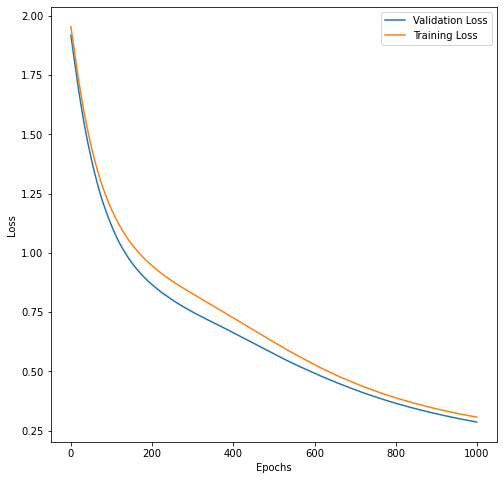

In [12]:
plot_loss(history)

# Task 7: Predictions

## 7.1: Plot Raw Predictions

Let's use the `compare_predictions` helper function to compare predictions from the model when it was untrained and when it was trained.

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


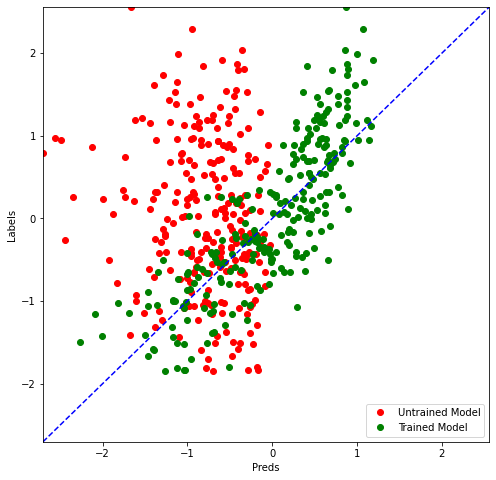

In [13]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

## 7.2: Plot Price Predictions

The plot for price predictions and raw predictions will look the same with just one difference: The x and y axis scale is changed.

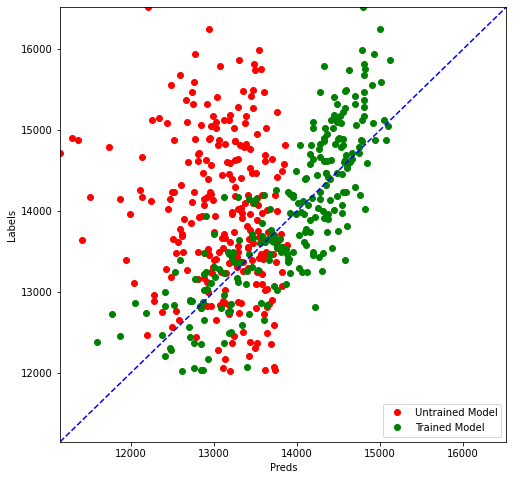

In [14]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_on_untrained, price_on_trained, price_y_test)